In [ ]:
# CSC 419 Homework Assignment 2
# Basic Classification - Part 1
# Code run/edit by Kristopher Smolarek (F00568254)
# Submitted May 25, 2024

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# Read transaction data .csv file to dataframe
# The .csv file is first uploaded to the Colab notebook
df = pd.read_csv('/content/transaction_data.csv')

# Test print (display .csv file, ensure data transmission)
#print("Dataframe: \n\n", df)

<Axes: xlabel='distance_from_home', ylabel='price_ratio'>

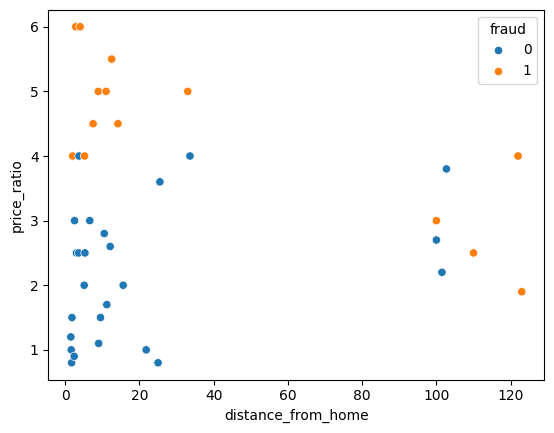

In [ ]:
# Visualize raw data using matplotlib, seaborn as sns
sns.scatterplot(x=df['distance_from_home'],y=df['price_ratio'], hue=df['fraud'])

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('fraud', axis=1)
y = df['fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
# This avoids overweighing data points that are imbalanced (by distance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting and Evaluating the Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test dataset
y_pred = knn.predict(X_test)
# Test print (check test predictions)
#print(y_pred)

In [ ]:
# Determine overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [ ]:
# Get the best value of k using cross-validation
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

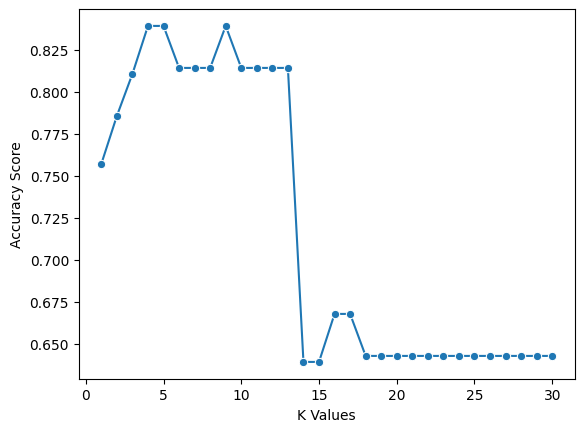

In [ ]:
# Visual the cross-validation results by plotting
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# Training the model using the best k-value
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Final output from classification model
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Best K:", best_k)

Accuracy: 0.875
Precision: 0.6666666666666666
Recall: 1.0
Best K: 4
